In [3]:
# Import Packages
import bs4 as bs
import pickle
import requests
import datetime as dt
import os

import pandas as pd
from pandas import DataFrame
import pandas_datareader.data as web
#import pandas.plotting
from pandas.plotting import register_matplotlib_converters
#import pandas.testing
from pandas.testing import assert_frame_equal
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
from matplotlib import style

import mplfinance  
from mpl_finance import candlestick_ohlc # mpl_finance is deprecated - need to update visualizations  
from concurrent import futures

import collections
from collections import Counter

import sklearn
from sklearn import svm, neighbors
from sklearn.svm import LinearSVC 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier, RandomForestClassifier

style.use('ggplot')

In [40]:
# Parts 1-3: Using Stock Market Data
# This example uses Tesla ($TSLA) stock data from 1/1/2000 to current date.
# df = pd.read_csv('c:/Users/JCW/Desktop/Stock_Market_Data_Analysis/Company Data/tsla.csv', parse_dates = True, index_col = 'Date')
start = dt.datetime(2017,1,1)
end = dt.datetime.now()
x = 'TSLA'
df = web.DataReader(x, 'yahoo', start, end)

print(df.tail(10))

                  High         Low        Open       Close      Volume  \
Date                                                                     
2022-05-16  769.760010  719.090027  767.159973  724.369995  28699500.0   
2022-05-17  764.479980  728.849976  747.359985  761.609985  26745400.0   
2022-05-18  760.500000  700.809998  744.520020  709.809998  29270600.0   
2022-05-19  734.000000  694.109985  707.000000  709.419983  30098900.0   
2022-05-20  721.580017  633.000000  713.989990  663.900024  48190600.0   
2022-05-23  679.960022  638.059998  655.020020  674.900024  29634500.0   
2022-05-24  653.919983  620.570007  653.530029  628.159973  29697500.0   
2022-05-25  669.320007  623.010010  623.849976  658.799988  30713100.0   
2022-05-26  718.669983  653.659973  661.419983  707.729980  35334400.0   
2022-05-27  759.799988  720.530029  723.250000  759.630005  29630300.0   

             Adj Close  
Date                    
2022-05-16  724.369995  
2022-05-17  761.609985  
2022-05-18 

#### All stock data are indexed by date

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1361 entries, 2017-01-03 to 2022-05-27
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1361 non-null   float64
 1   Low        1361 non-null   float64
 2   Open       1361 non-null   float64
 3   Close      1361 non-null   float64
 4   Volume     1361 non-null   float64
 5   Adj Close  1361 non-null   float64
dtypes: float64(6)
memory usage: 74.4 KB


In [42]:
# Read data into csv.
df = web.DataReader(x, 'yahoo', start, end)
df.to_csv(x +'.csv')
df = pd.read_csv(x +'.csv', parse_dates = True, index_col = 'Date')

# Moving average over 100 day period. You can alter the window to average over 30 days, or another time period.
df['100ma'] = df['Adj Close'].rolling(window = 100, min_periods = 0).mean()
df.dropna(inplace = True)
print(df.tail())

                  High         Low        Open       Close      Volume  \
Date                                                                     
2022-05-23  679.960022  638.059998  655.020020  674.900024  29634500.0   
2022-05-24  653.919983  620.570007  653.530029  628.159973  29697500.0   
2022-05-25  669.320007  623.010010  623.849976  658.799988  30713100.0   
2022-05-26  718.669983  653.659973  661.419983  707.729980  35334400.0   
2022-05-27  759.799988  720.530029  723.250000  759.630005  29630300.0   

             Adj Close       100ma  
Date                                
2022-05-23  674.900024  925.742697  
2022-05-24  628.159973  921.320897  
2022-05-25  658.799988  917.341097  
2022-05-26  707.729980  912.420596  
2022-05-27  759.630005  908.520997  


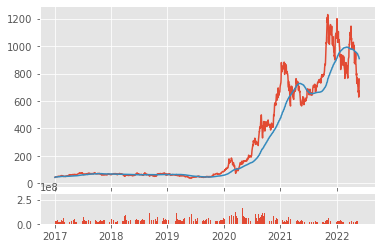

In [43]:
# Plot data using two plots (one for adjusted close price, one for volume).
ax1 = plt.subplot2grid((6,1), (0,0), rowspan = 5, colspan = 1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan = 1, colspan = 1, sharex = ax1)

# Volume is shown in the subplot as a bar chart, and adj close is a line graph. Red is actual
# price, and blue is the 100 moving average.
ax1.plot(df.index, df['Adj Close'])
ax1.plot(df.index, df['100ma'])
ax2.bar(df.index, df['Volume'])
plt.show()

In [21]:
# Part 5: Getting S&P500 List
# Here we are using BeautifulSoup to scrape data from wikipedia, and save the current S&P500 list.
def save_sp500_tickers():
    resp = requests.get('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, "lxml")
    table = soup.find('table', {'id': 'constituents'})
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.find_all('td')[0].text.strip()
        tickers.append(ticker)
        
    with open("sp500tickers.pickle", "wb") as f:
        pickle.dump(tickers, f)

    #print(tickers)

    return tickers

save_sp500_tickers()


['MMM',
 'AOS',
 'ABT',
 'ABBV',
 'ABMD',
 'ACN',
 'ATVI',
 'ADM',
 'ADBE',
 'ADP',
 'AAP',
 'AES',
 'AFL',
 'A',
 'AIG',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AMD',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'ANTM',
 'AON',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ANET',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'AZO',
 'AVB',
 'AVY',
 'BKR',
 'BALL',
 'BAC',
 'BBWI',
 'BAX',
 'BDX',
 'WRB',
 'BRK.B',
 'BBY',
 'BIO',
 'TECH',
 'BIIB',
 'BLK',
 'BK',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BF.B',
 'CHRW',
 'CDNS',
 'CZR',
 'CPT',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'CNC',
 'CNP',
 'CDAY',
 'CERN',
 'CF',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CTXS',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'C

In [22]:
# Part 6: Getting Stock Prices
# Get data from Yahoo and call SP500 tickers list as sp500
def get_data_from_yahoo(reload_sp500 = False):
    n = 0
    if reload_sp500:
        tickers = save_sp500_tickers()
    else:
        with open("sp500tickers.pickle", "rb") as f:
            tickers = pickle.load(f)

# Take all of the data for stocks and store in a directory
# Working with API, parsing website, take entire dataset and store locally
# Here we will look at Adjusted Close, but we can look at other columns later
    if not os.path.exists('stock_dfs2'):
        os.makedirs('stock_dfs2')
    
    start = dt.datetime(2016,1,1)        
    end = dt.datetime.now()
    #end = dt.datetime(2020,7,24)

    # Grab all ticker data
    for ticker in tickers:
        print(str( n )+ '. ' + ticker) 
        n += 1   
        if not os.path.exists('stock_dfs2/{}.csv'.format(ticker)):
            try:
                df = web.DataReader(ticker, 'yahoo', start, end)
                df.to_csv('stock_dfs2/{}.csv'.format(ticker))
            except:
                print(f'Problems retrieving data for {ticker}. Skipping!')
            else:
                print('Already have {}'.format(ticker))

get_data_from_yahoo()

0. MMM
1. AOS
2. ABT
3. ABBV
4. ABMD
5. ACN
6. ATVI
7. ADM
8. ADBE
9. ADP
10. AAP
11. AES
12. AFL
13. A
14. AIG
15. APD
16. AKAM
17. ALK
18. ALB
19. ARE
20. ALGN
21. ALLE
22. LNT
23. ALL
24. GOOGL
25. GOOG
26. MO
27. AMZN
28. AMCR
29. AMD
30. AEE
31. AAL
32. AEP
33. AXP
34. AMT
35. AWK
36. AMP
37. ABC
38. AME
39. AMGN
40. APH
41. ADI
42. ANSS
43. ANTM
44. AON
45. APA
46. AAPL
47. AMAT
48. APTV
49. ANET
50. AIZ
51. T
52. ATO
53. ADSK
54. AZO
55. AVB
56. AVY
57. BKR
58. BALL
59. BAC
60. BBWI
61. BAX
62. BDX
63. WRB
64. BRK.B
Problems retrieving data for BRK.B. Skipping!
65. BBY
66. BIO
67. TECH
68. BIIB
69. BLK
70. BK
71. BA
72. BKNG
73. BWA
74. BXP
75. BSX
76. BMY
77. AVGO
78. BR
79. BRO
80. BF.B
Problems retrieving data for BF.B. Skipping!
81. CHRW
82. CDNS
83. CZR
84. CPT
85. CPB
86. COF
87. CAH
88. KMX
89. CCL
90. CARR
91. CTLT
92. CAT
93. CBOE
94. CBRE
95. CDW
96. CE
97. CNC
98. CNP
99. CDAY
100. CERN
101. CF
102. CRL
103. SCHW
104. CHTR
105. CVX
106. CMG
107. CB
108. CHD
109. CI
11

In [24]:
# Part 7: Combine S&P500 List with Adjusted Close Price for All Companies
def compile_data():
    with open("sp500tickers.pickle", "rb") as f:
        tickers = pickle.load(f)
    mainDataSet = pd.DataFrame()

# Count in SP500 tickers list
    for count, ticker in enumerate(tickers):
        try:
            fileDataSet = pd.read_csv('stock_dfs2/{}.csv'.format(ticker))
            fileDataSet.set_index('Date', inplace = True)
            fileDataSet.rename(columns = {'Adj Close':ticker}, inplace = True)
            fileDataSet.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace = True)

            if mainDataSet.empty:
                mainDataSet = fileDataSet
            else:
                mainDataSet = mainDataSet.join(fileDataSet)
            #print(mainDataSet.head())
        except:
            print(f'Problems retrieving data for {ticker}. Skipping!')
    mainDataSet.to_csv('sp500_joined_closes.csv')
compile_data();

C:\Users\Dell\AppData\Local\Temp/ipykernel_23996/1811559615.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  fileDataSet.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace = True)


Problems retrieving data for BRK.B. Skipping!
Problems retrieving data for BF.B. Skipping!


           MMM       AOS       ABT      ABBV      ABMD       ACN      ATVI  \
MMM   1.000000  0.627513  0.168979  0.305798  0.513860  0.205439  0.443208   
AOS   0.627513  1.000000  0.678445  0.801038  0.618466  0.782886  0.693774   
ABT   0.168979  0.678445  1.000000  0.850860  0.642160  0.961595  0.748853   
ABBV  0.305798  0.801038  0.850860  1.000000  0.654806  0.891816  0.768794   
ABMD  0.513860  0.618466  0.642160  0.654806  1.000000  0.610351  0.678883   

           ADM      ADBE       ADP  ...       WMB       WTW      WYNN  \
MMM   0.181806  0.213004  0.214340  ...  0.448926  0.216344  0.714878   
AOS   0.756618  0.689916  0.710448  ...  0.740656  0.662381  0.266202   
ABT   0.770898  0.968977  0.945782  ...  0.463392  0.956238 -0.142068   
ABBV  0.906402  0.803248  0.864232  ...  0.686419  0.814425  0.001354   
ABMD  0.524839  0.659183  0.651562  ...  0.457524  0.568852  0.321057   

           XEL       XYL       YUM      ZBRA       ZBH      ZION       ZTS  
MMM   0.060747 

C:\Users\Dell\AppData\Local\Temp/ipykernel_23996/11838693.py:22: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  heatmap = ax.pcolor(data, cmap = plt.cm.RdYlGn)
C:\Users\Dell\AppData\Local\Temp/ipykernel_23996/11838693.py:23: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(heatmap)


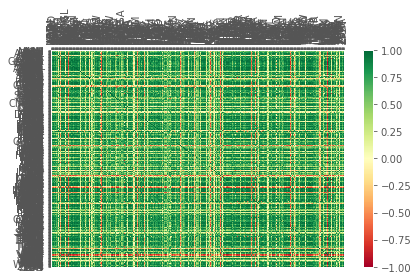

In [25]:
# Part 8: Correlation Tables & Data Visualization
# Visualizing data from the SP500 close price csv 
def visualize_data():
    df = pd.read_csv('sp500_joined_closes.csv')

# Example of plotting one company close price over time for Apple (ticker = AAPL) 
#    df['AAPL'].plot()
#    plt.show()

# Create correlation table for all data in df for SP500 close price
    df_corr = df.corr()
    print(df_corr.head())
# Visualize inner values of dataframe (numpy array of columns and rows)
# Specify figure and define axes using parameters(111) : one subplot is 1x1 for plot 1)
    data = df_corr.values
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)

# Define heatmap using a range from red to yellow to green
# Red = Negative, Yellow = Neutral, Green = Positive
# Colorbar for legend
    heatmap = ax.pcolor(data, cmap = plt.cm.RdYlGn)
    fig.colorbar(heatmap)
# Build graph
    ax.set_xticks(np.arange(data.shape[0]) + 0.5, minor = False)
    ax.set_yticks(np.arange(data.shape[1]) + 0.5, minor = False)
    ax.invert_yaxis()
    ax.xaxis.tick_top()

    column_labels = df_corr.columns
    row_labels = df_corr.index
# Make x labels vertical, set limit of colors (-1 = min, 1 = max)
    ax.set_xticklabels(column_labels)
    ax.set_yticklabels(row_labels)
    plt.xticks(rotation = 90)
    heatmap.set_clim(-1, 1)
    plt.tight_layout()
    plt.show()
visualize_data()

In [26]:
# Take feature data and determine label by asking:
# "Within next 7 trading days did price go up more than x% (i.e. 2%)?"
# If yes, sell company.
# If no, hold company.

# Each model generated per company
# Each company model considers pricing data from entire SP500 dataset
# To look further into the future, i.e. 30 days, change to "hm_days = 30:
def process_data_for_labels(ticker):
    hm_days = 7
    fileDataSet = pd.read_csv('sp500_joined_closes.csv', index_col = 0)
    tickers = fileDataSet.columns.values.tolist()
    fileDataSet.fillna(0, inplace = True)

# Preprocessing Data for ML

# The range will go up to a certain point (for 7 days)  
# Create custom dataset to predict future values based on percentage change
# Value in percent change = price in two days from now
# less today's price, divided by today's price, multiplied by 100.
    for i in range(1, hm_days+1):
        fileDataSet['{}d'.format(ticker, i)] = (fileDataSet[ticker].shift(-i) - fileDataSet[ticker]) / fileDataSet[ticker]

    fileDataSet.fillna(0, inplace = True)
    return tickers, fileDataSet

# Here we look at Bank of America (ticker = BAC); change ticker to view another company.
process_data_for_labels('BAC')

(['MMM',
  'AOS',
  'ABT',
  'ABBV',
  'ABMD',
  'ACN',
  'ATVI',
  'ADM',
  'ADBE',
  'ADP',
  'AAP',
  'AES',
  'AFL',
  'A',
  'AIG',
  'APD',
  'AKAM',
  'ALK',
  'ALB',
  'ARE',
  'ALGN',
  'ALLE',
  'LNT',
  'ALL',
  'GOOGL',
  'GOOG',
  'MO',
  'AMZN',
  'AMCR',
  'AMD',
  'AEE',
  'AAL',
  'AEP',
  'AXP',
  'AMT',
  'AWK',
  'AMP',
  'ABC',
  'AME',
  'AMGN',
  'APH',
  'ADI',
  'ANSS',
  'ANTM',
  'AON',
  'APA',
  'AAPL',
  'AMAT',
  'APTV',
  'ANET',
  'AIZ',
  'T',
  'ATO',
  'ADSK',
  'AZO',
  'AVB',
  'AVY',
  'BKR',
  'BALL',
  'BAC',
  'BBWI',
  'BAX',
  'BDX',
  'WRB',
  'BBY',
  'BIO',
  'TECH',
  'BIIB',
  'BLK',
  'BK',
  'BA',
  'BKNG',
  'BWA',
  'BXP',
  'BSX',
  'BMY',
  'AVGO',
  'BR',
  'BRO',
  'CHRW',
  'CDNS',
  'CZR',
  'CPT',
  'CPB',
  'COF',
  'CAH',
  'KMX',
  'CCL',
  'CARR',
  'CTLT',
  'CAT',
  'CBOE',
  'CBRE',
  'CDW',
  'CE',
  'CNC',
  'CNP',
  'CDAY',
  'CERN',
  'CF',
  'CRL',
  'SCHW',
  'CHTR',
  'CVX',
  'CMG',
  'CB',
  'CHD',
  'CI',
  'C

In [27]:
def buy_sell_hold(*args):
    cols = [c for c in args]
    requirement = 0.02
    for col in cols:
        if col > requirement:
            return 1
        if col < -requirement:
            return -1
    return 0

In [28]:
# Part 11 ML Labels
# Map the function above to a column
def extract_featuresets(ticker):
    tickers, fileDataSet = process_data_for_labels(ticker)

# Define new column, value = mapped function using arg
# Arg = 7-day & change for future price; Pass paramters to function
# Generate labels for buy, sell, or hold
    fileDataSet['{}_target'.format(ticker)] = list(map(buy_sell_hold, fileDataSet[[c for c in fileDataSet.columns if c not in tickers]].values))

    vals = fileDataSet['{}_target'.format(ticker)].values.tolist()
    str_vals = [str(i) for i in vals]
    print('Data spread:', Counter(str_vals))
    
# List of options
    fileDataSet.fillna(0, inplace = True)
    fileDataSet = fileDataSet.replace([np.inf, -np.inf], np.nan)
    fileDataSet.dropna(inplace = True)

# Normalizing data set for ticker (prices) by using percent change.
    fileDataSet_vals = fileDataSet[[ticker_name for ticker_name in tickers]].pct_change()
    fileDataSet_vals = fileDataSet_vals.replace([np.inf, -np.inf], 0)
    fileDataSet_vals.fillna(0, inplace = True)

    X = fileDataSet_vals.values
    y = fileDataSet['{}_target'.format(ticker)].values

    return X, y, fileDataSet

extract_featuresets('BAC')

Data spread: Counter({'1': 603, '0': 544, '-1': 460})


(array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.00435954, -0.00558685, -0.00023254, ...,  0.02082345,
         -0.01085734,  0.01565495],
        [-0.02014117, -0.01979642, -0.00838777, ...,  0.00432977,
         -0.0291447 ,  0.00020812],
        ...,
        [ 0.01222589,  0.0232282 ,  0.04402517, ...,  0.03700482,
          0.03721899,  0.00561929],
        [-0.02238417, -0.04275059, -0.01571506, ..., -0.02454348,
         -0.03460841, -0.04548454],
        [-0.01108842,  0.00986671, -0.00319319, ...,  0.00283385,
         -0.01830191,  0.00541358]]),
 array([-1, -1, -1, ...,  0,  0,  0], dtype=int64),
                    MMM        AOS         ABT        ABBV        ABMD  \
 Date                                                                    
 2016-01-04  121.852066  34.006840   38.041809   43.257999   85.239998   
 2016-01-05  122.383286  33.816849   38.032963   43.077782   85.000000   
 2016-01-06  119.918343  

In [29]:
# Part 12: ML Algorithm with Voting Classifier 
# Repeat above using Voting Classifier
def do_ml(ticker):
    X, y, fileDataSet = extract_featuresets(ticker)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
    #clf = neighbors.KNeighborsClassifier()
# Replace simple classifier with voting classifier:
# Voting classifier will take list of tuples of classifier by name, classifier
# List contains tuples (i.e. 3 classifiers: linear svc, neigbors, random forest classifiers) 
    #clf = VotingClassifier([('lsvc', svm.LinearSVC()),
    clf = VotingClassifier([('lsvc', LinearSVC()), 
                            ('knn', neighbors.KNeighborsClassifier()),
                            ('rfor', RandomForestClassifier())])

    clf.fit(X_train, y_train)
    confidence = clf.score(X_test, y_test)
    print('Accuracy', confidence)
    predictions = clf.predict(X_test)
    print('Predicted spread:', Counter(predictions))

    return confidence

do_ml('BAC')

Data spread: Counter({'1': 603, '0': 544, '-1': 460})
Accuracy 0.3706467661691542
Predicted spread: Counter({-1: 146, 0: 134, 1: 122})


0.3706467661691542